In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv", sep=',')

/Users/CorbanChiu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# removing features with more than half the values null
non_nulls = accepted.count() > 0.5*len(accepted)

In [6]:
accepted = accepted[non_nulls.index[non_nulls]]
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 107 entries, id to debt_settlement_flag
dtypes: float64(83), object(24)
memory usage: 1.8+ GB


In [7]:
sample_features = ['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                   'issue_d', 'purpose', 'zip_code', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
                   'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'tax_liens',
                   'tot_hi_cred_lim', 'total_bal_ex_mort', 'int_rate']

features = accepted[sample_features]
features = features.dropna()
features

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,earliest_cr_line,fico_range_low,fico_range_high,initial_list_status,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,int_rate
0,3600.0,36 months,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,190xx,5.91,Aug-2003,675.0,679.0,w,Individual,0.0,0.0,178050.0,7746.0,13.99
1,24700.0,36 months,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,577xx,16.06,Dec-1999,715.0,719.0,w,Individual,0.0,0.0,314017.0,39475.0,11.99
2,20000.0,60 months,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,home_improvement,605xx,10.78,Aug-2000,695.0,699.0,w,Joint App,0.0,0.0,218418.0,18696.0,10.78
3,35000.0,60 months,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,debt_consolidation,076xx,17.06,Sep-2008,785.0,789.0,w,Individual,0.0,0.0,381215.0,52226.0,14.85
4,10400.0,60 months,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,major_purchase,174xx,25.37,Jun-1998,695.0,699.0,w,Individual,0.0,0.0,439570.0,95768.0,22.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60 months,7 years,MORTGAGE,95000.0,Source Verified,Oct-2016,home_improvement,356xx,19.61,Dec-1999,665.0,669.0,f,Individual,0.0,0.0,102517.0,104422.0,12.79
2260695,24000.0,60 months,10+ years,MORTGAGE,108000.0,Not Verified,Oct-2016,debt_consolidation,840xx,34.94,Feb-1991,695.0,699.0,f,Individual,0.0,1.0,227883.0,140118.0,10.49
2260696,40000.0,60 months,9 years,MORTGAGE,227000.0,Verified,Oct-2016,debt_consolidation,907xx,12.75,Feb-1995,705.0,709.0,f,Individual,0.0,0.0,55970.0,28398.0,10.49
2260697,24000.0,60 months,6 years,RENT,110000.0,Not Verified,Oct-2016,debt_consolidation,334xx,18.30,Jul-1999,660.0,664.0,f,Individual,1.0,0.0,84664.0,62426.0,14.49


In [8]:
features['emp_length'] = features['emp_length'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['term'] = features['term'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['verification_status'].replace({'Not Verified': 0, 'Source Verified': 1, 'Verified': 1}, inplace=True)
features['earliest_cr_line'] = pd.to_datetime(features['earliest_cr_line'], format='%b-%Y')
features['issue_d'] = pd.to_datetime(features['issue_d'], format='%b-%Y')
diff = (features['issue_d'] - features['earliest_cr_line']).dt.days // 30
features['credit_length_months'] = diff.astype(int)
features['zip_code'] = features['zip_code'].astype(str).str.extract('(\d+)', expand=False).astype(float)
features['fico_score'] = (features['fico_range_low'] + features['fico_range_high'])/2
features['initial_list_status'].replace({'w': 1, 'f': 0}, inplace=True)
features['application_type'].replace({'Individual': 1, 'Joint App': 2}, inplace=True)
dummies = ['purpose', 'home_ownership']
features = pd.get_dummies(features, columns=dummies, drop_first=True)

In [21]:
import seaborn as sns

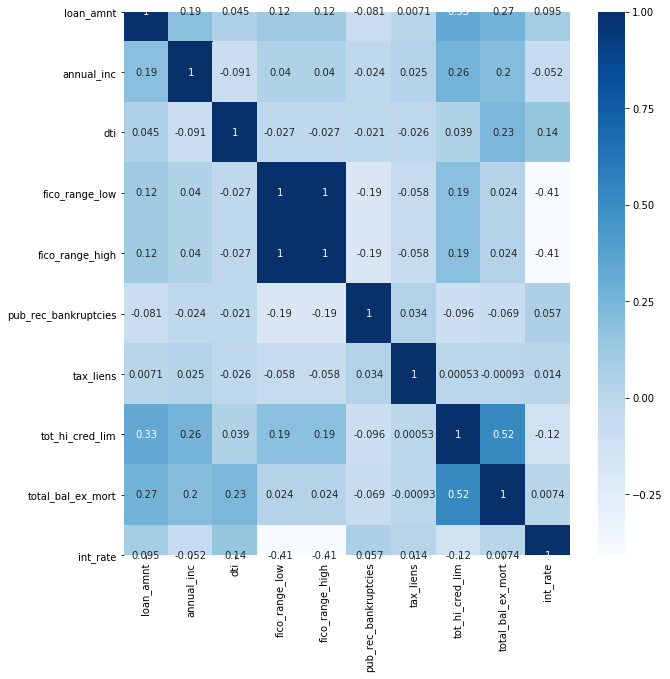

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True, cmap='Blues')

In [9]:
data = features.drop(['issue_d', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'int_rate'], axis=1)

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, features['int_rate'])
linear_reg = LinearRegression().fit(X_train, y_train)

mean_squared_error(y_test, linear_reg.predict(X_test))

13.998221279949325

In [11]:
linear_reg.coef_

array([ 1.76804211e-05,  1.72554270e-01,  3.95180726e-03, -7.52146461e-07,
        9.42906754e-01, -1.07545345e-04,  4.39301814e-02, -1.46059463e+00,
        5.82449342e-01, -2.02820619e-01, -5.72024809e-02, -1.75368959e-06,
        3.70515671e-07, -4.24942162e-03, -5.55908631e-02, -1.60220759e+00,
       -1.81430935e-01,  6.80871964e+00,  1.22150332e-01,  1.60571395e+00,
        3.84371902e-01,  1.05179334e+00,  1.79403053e+00,  1.45488722e+00,
        1.93185681e+00,  2.46059695e+00,  1.09792080e+00,  3.94389710e+00,
       -6.25054537e-01,  1.57519785e+00,  1.37353228e+00, -2.22201080e-01,
       -3.03959669e-01])

In [62]:
nn_reg = MLPRegressor().fit(X_train, y_train)
mean_squared_error(y_test, nn_reg.predict(X_test))

23.566035183736467